In [8]:
import pandas as pd 
import matplotlib.pyplot as plt 

## Идентификация наиболее распространенных типов нарушений. Это поможет выявить наиболее серьезные проблемы в области безопасности дорожного движения

## Identification of the most common types of violations. This will help to identify the most serious road safety problems

In [9]:
file_path = "C:\\Users\\99699\\Road-Safety-Looking-to-the-Future\\Full Finish Data RU\\RUS_combined_data.csv"

In [10]:
df = pd.read_csv(file_path)

In [11]:
df.columns

Index(['Unnamed: 0', 'id', 'car_brand', 'car_model', 'violation_date',
       'crossroad_name', 'violation_protocol_name', 'violation_ammount'],
      dtype='object')

In [12]:
violation_types = df["violation_protocol_name"].unique()

In [13]:
violation_types

array(['Превышение установленной скорости движения на величину свыше 20км/ч, но не более 40 км/ч',
       'Невыполнение требований ПДД об остановке перед стоп-линией, обозначенной дорожным знаком или разметкой проезжей части, при запрещающем сигнале светофора или жесте регулировщика',
       'Превышение установленной скорости движения на величину свыше 10км/ч, но не более 20 км/ч',
       'Нарушение требований разметки проезжей части дороги',
       'Невыполнение требований дорожных знаков',
       'Проезд на запрещенный сигнал светофора, либо жест регулировщика',
       'Нарушение правил обгона или маневрирования с выездом на полосу встречного движения',
       'Превышение установленной скорости движения на величину свыше 40км/ч, но не более 60 км/ч',
       'Превышение установленной скорости движения на величину более 60км/ч',
       'Нарушение правил маневрирования',
       'Нарушение правил остановки или стоянки, в том числе остановка или стоянка на полосе для маршрутных транспортн

In [14]:
violation_counts = {}

In [15]:
for violation_type in violation_types:
    violation_counts[violation_type] = len(df[df["violation_protocol_name"] == violation_type])

In [16]:
violation_counts = sorted(violation_counts.items(), key = lambda x : x[1], reverse = True)

In [17]:
for violation_type, count in violation_counts:
    print(f"{violation_type} : {count}")

Превышение установленной скорости движения на величину свыше 10км/ч, но не более 20 км/ч : 897934
Невыполнение требований дорожных знаков : 294253
Нарушение требований разметки проезжей части дороги : 271635
Превышение установленной скорости движения на величину свыше 20км/ч, но не более 40 км/ч : 252421
Нарушение «превышение скорости» свыше 10 км/ч, но не более 20 км/ч : 200461
Невыполнение требований ПДД об остановке перед стоп-линией, обозначенной дорожным знаком или разметкой проезжей части, при запрещающем сигнале светофора или жесте регулировщика : 182203
Нарушение «превышение скорости» свыше 20 км/ч, но не более 40 км/ч : 94919
Нарушение правил обгона или маневрирования с выездом на полосу встречного движения : 68506
Проезд на запрещенный сигнал светофора, либо жест регулировщика : 36826
Превышение установленной скорости движения на величину свыше 40км/ч, но не более 60 км/ч : 20875
Нарушение правил маневрирования : 19718
Нарушение «превышение скорости» свыше 40 км/ч, но не боле

<b>Vizualization</b>

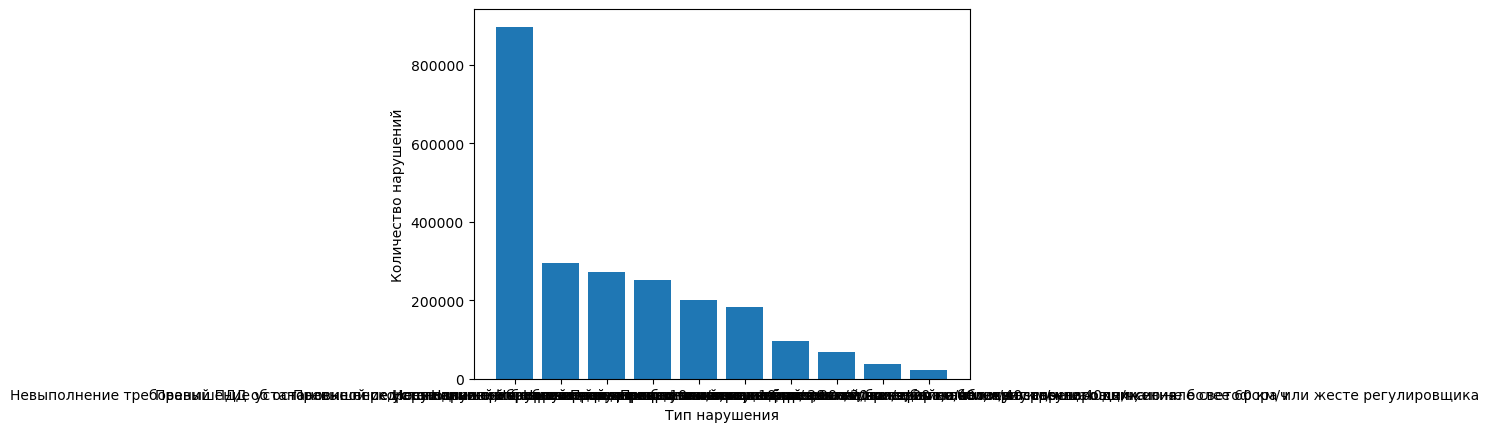

In [18]:
violation_types, counts = zip(*violation_counts[:10])
plt.bar(violation_types, counts)
plt.xlabel("Тип нарушения")
plt.ylabel("Количество нарушений")
plt.show()

<b>Круговая диаграмма</b>

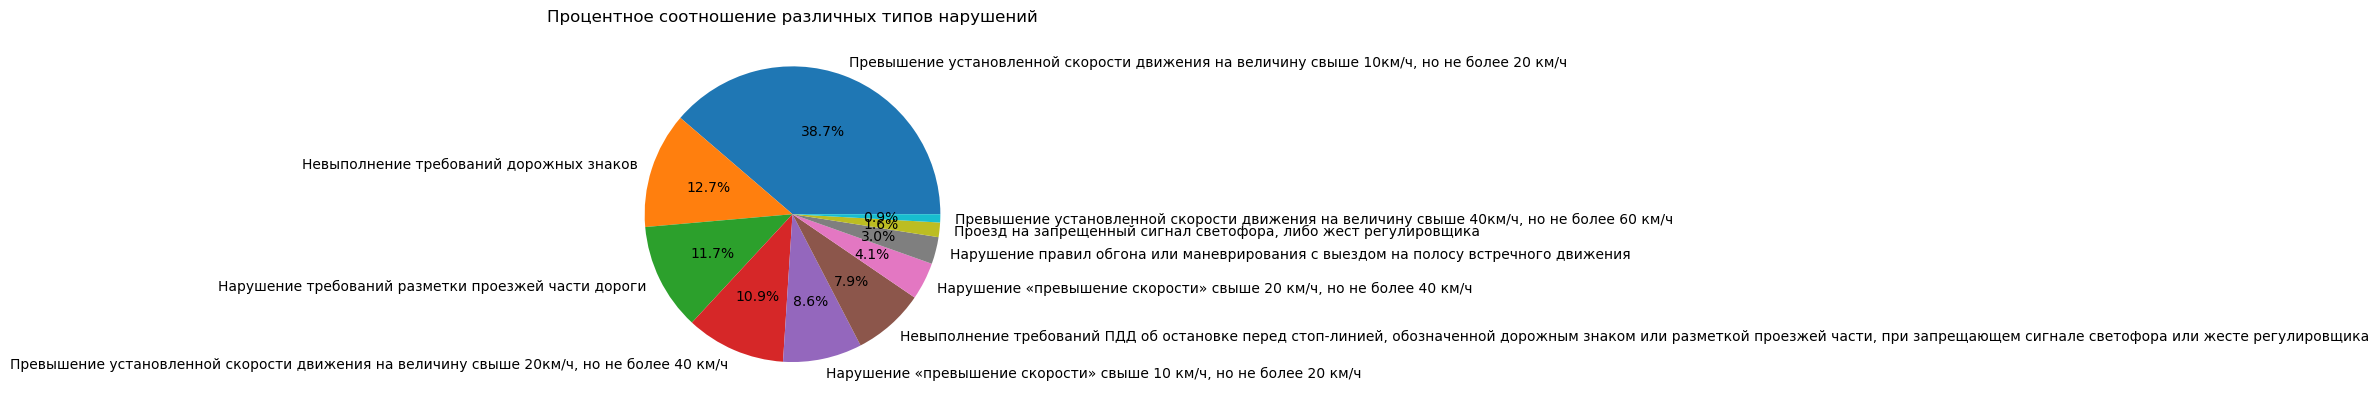

In [19]:
percentages = [count / sum(counts) * 100 for count in counts]
plt.pie(percentages, labels=violation_types, autopct="%.1f%%")
plt.title("Процентное соотношение различных типов нарушений")
plt.show()

<b>График времени</b>

<b>Тепловая карта</b>

In [20]:
regions = df["crossroad_name"].unique()
regions

array(['А/д Бишкек - Торугарт. г. Кемин. 102 км.',
       'А/д Бишкек - Аэропорт «Манас». АЗС Ак-Жол, 23 км',
       'А/д Биш. Торугарт, 20км.,  с. Люксембург',
       'г. Бишкек, пересечение пр. Чуй - ул. Ю.Абдрахманова',
       'г. Бишкек, пересечение ул. Ю.Абдрахманова - ул. Ж.Боконбаева',
       'А/д Бишкек – Торугарт, 18 км.',
       'г. Бишкек, пересечение пр. Жибек Жолу - пр. Манаса',
       'г. Бишкек, пересечение бул. М.Ганди - ул. А.Боталиева',
       'г. Бишкек, пересечение ул. А.Суеркулова - ул. Б.Юнусалиева',
       'г. Бишкек, пересечение пр. Чуй - пр. Манаса',
       'г. Бишкек, пересечение пр. Дэн Сяопина - ул. Ж.Садыгалиева',
       'г. Бишкек, пересечение ул. Байтик Баатыра - ул. М.Горького',
       'г. Бишкек, пересечение пр. Жибек Жолу - ул. Ю.Абдрахманова',
       'А/д Бишкек - Ош. 74,5 км.',
       'А/д Бишкек - Торугарт. с. Жаны-Алыш. 95 км.',
       'г. Бишкек, пересечение ул. Байтик Баатыра - ул. А.Суеркулова',
       'А/д.Бишкек – Кордай. с.Ленинское. 15,5 км.

In [ ]:
violation_counts_by_region = {}
for region in regions:
 violation_counts_by_region[region] = [
    len(df[df["crossroad_name"] == region] [df["violation_protocol_name"] == violation_type])
    for violation_type in violation_types
 ]

C:\Users\99699\AppData\Local\Temp\ipykernel_9788\2708312002.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df["crossroad_name"] == region] [df["violation_protocol_name"] == violation_type])


In [ ]:
violation_counts_by_region

In [ ]:
'''
plt.pcolormesh(violation_counts_by_region)
plt.xticks(list(range(len(regions))), regions)
plt.yticks(list(range(len(violation_types))), violation_types)
plt.title("Тип нарушения по региону")
plt.show()
'''